In [1]:
from fastai import *
from fastai.vision import *
from fastai.metrics import error_rate, accuracy

In [2]:
PATH_IMG = Path('/home/shivam-gupta/Desktop/Python/PlantVillage-Dataset/data_distribution_for_SVM')

In [3]:
PATH_IMG

PosixPath('/home/shivam-gupta/Desktop/Python/PlantVillage-Dataset/data_distribution_for_SVM')

In [4]:
bs = 64

In [5]:
img_data = ImageDataBunch.from_folder(path=PATH_IMG, train='train', valid='val', ds_tfms=get_transforms(), size=224, bs=bs)
img_data.normalize(imagenet_stats)

ImageDataBunch;

Train: LabelList (18826 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
Grape___Esca_(Black_Measles),Grape___Esca_(Black_Measles),Grape___Esca_(Black_Measles),Grape___Esca_(Black_Measles),Grape___Esca_(Black_Measles)
Path: /home/shivam-gupta/Desktop/Python/PlantVillage-Dataset/data_distribution_for_SVM;

Valid: LabelList (8751 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
Grape___Esca_(Black_Measles),Grape___Esca_(Black_Measles),Grape___Esca_(Black_Measles),Grape___Esca_(Black_Measles),Grape___Esca_(Black_Measles)
Path: /home/shivam-gupta/Desktop/Python/PlantVillage-Dataset/data_distribution_for_SVM;

Test: None

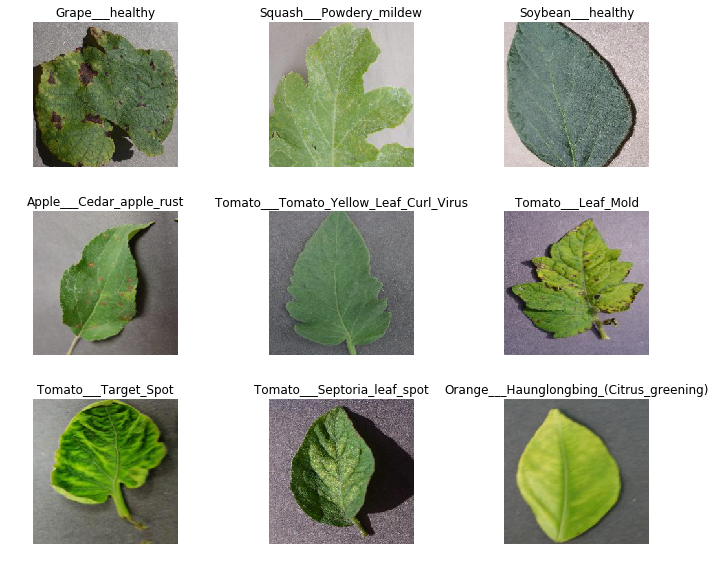

In [6]:
img_data.show_batch(rows=3, figsize=(10,8))

In [21]:
labels = img_data.classes

In [8]:
model = cnn_learner(img_data, models.resnet34, metrics=[accuracy, error_rate])

In [9]:
model.fit_one_cycle(2)

epoch,train_loss,valid_loss,accuracy,error_rate,time
0,0.421883,0.144742,0.954405,0.045595,1:16:29
1,0.211161,0.077034,0.975317,0.024683,1:19:59


In [10]:
model.save('train_7_cycles')

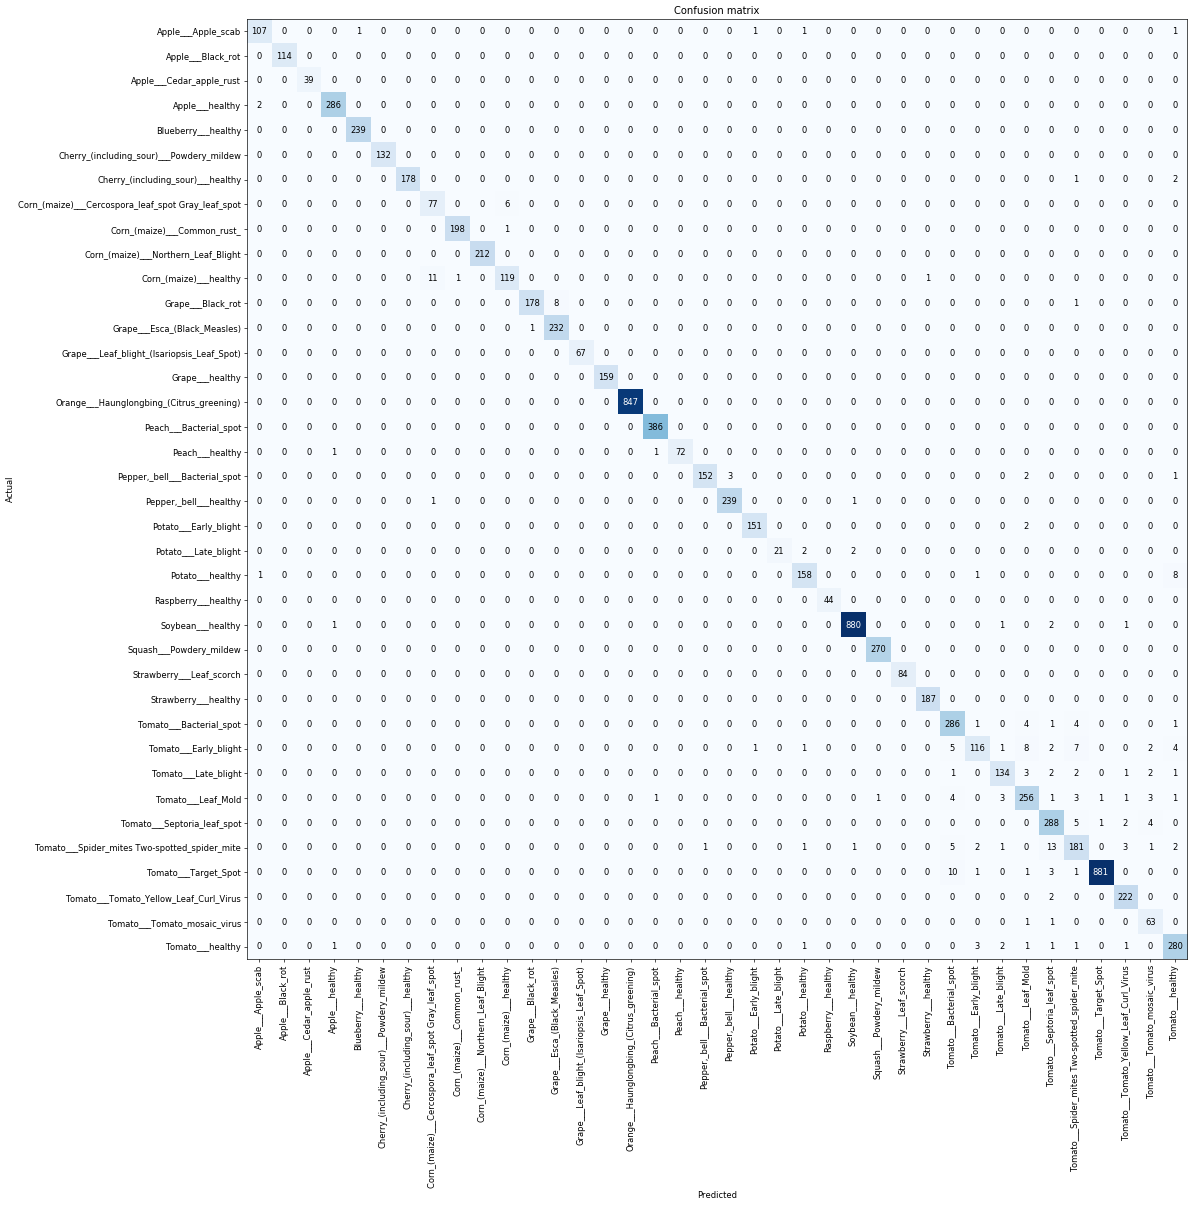

In [11]:
interpret = ClassificationInterpretation.from_learner(model)

interpret.plot_confusion_matrix(figsize=(20,20), dpi=60)

In [16]:
cm = interpret.confusion_matrix

In [26]:
def precision(label, confusion_matrix):
    col = confusion_matrix[:, label]
    return confusion_matrix[label, label] / col.sum()
    
def recall(label, confusion_matrix):
    row = confusion_matrix[label, :]
    return confusion_matrix[label, label] / row.sum()
def precision_macro_average(confusion_matrix):
    rows, columns = 38,38
    sum_of_precisions = 0
    for label in range(rows):
        sum_of_precisions += precision(label, confusion_matrix)
    return sum_of_precisions / rows
def recall_macro_average(confusion_matrix):
    rows, columns = 38,38
    sum_of_recalls = 0
    for label in range(columns):
        sum_of_recalls += recall(label, confusion_matrix)
    return sum_of_recalls / columns

In [24]:
print("label precision recall")
for label in range(38):
    print(f"{labels:5d} {precision(labels, cm):9.3f} {recall(labels, cm):6.3f}")

label precision recall
{labels:5d} {precision(labels, cm):9.3f} {recall(labels, cm):6.3f}
{labels:5d} {precision(labels, cm):9.3f} {recall(labels, cm):6.3f}
{labels:5d} {precision(labels, cm):9.3f} {recall(labels, cm):6.3f}
{labels:5d} {precision(labels, cm):9.3f} {recall(labels, cm):6.3f}
{labels:5d} {precision(labels, cm):9.3f} {recall(labels, cm):6.3f}
{labels:5d} {precision(labels, cm):9.3f} {recall(labels, cm):6.3f}
{labels:5d} {precision(labels, cm):9.3f} {recall(labels, cm):6.3f}
{labels:5d} {precision(labels, cm):9.3f} {recall(labels, cm):6.3f}
{labels:5d} {precision(labels, cm):9.3f} {recall(labels, cm):6.3f}
{labels:5d} {precision(labels, cm):9.3f} {recall(labels, cm):6.3f}


In [27]:
print("precision total:", precision_macro_average(cm))
print("recall total:", recall_macro_average(cm))

TypeError: 'method' object is not subscriptable